In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
data = pd.read_csv('walmart.csv')

In [44]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [45]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [46]:
missing_data = data.isnull()
missing_data.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [47]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Store
False    6435
Name: Store, dtype: int64

Date
False    6435
Name: Date, dtype: int64

Weekly_Sales
False    6435
Name: Weekly_Sales, dtype: int64

Holiday_Flag
False    6435
Name: Holiday_Flag, dtype: int64

Temperature
False    6435
Name: Temperature, dtype: int64

Fuel_Price
False    6435
Name: Fuel_Price, dtype: int64

CPI
False    6435
Name: CPI, dtype: int64

Unemployment
False    6435
Name: Unemployment, dtype: int64



In [53]:
avg_Weekly_Sales = data["Weekly_Sales"].astype("float").mean(axis=0)
print("Average of Weekly_Sales:", avg_Weekly_Sales)

Average of Weekly_Sales: 1046964.8775617732


In [57]:
avg_Weekly_Sales=data['Weekly_Sales'].astype('float').mean(axis=0)
print("Average of Unemployment:", avg_Weekly_Sales)
# replace NaN by mean value in "Weekly_Sales" column
data["Weekly_Sales"].replace(np.nan, avg_Weekly_Sales, inplace = True)

Average of Unemployment: 1046964.8775617732


In [62]:
data['Unemployment'].value_counts()

8.099    78
8.163    56
7.852    56
8.200    52
6.565    52
         ..
7.138     4
8.665     4
8.000     4
9.151     4
5.217     4
Name: Unemployment, Length: 349, dtype: int64

In [67]:
# simply drop whole row with NaN in "CPI" column
data.dropna(subset=["CPI"], axis=0, inplace=True)

# reset index, because we droped two rows
data.reset_index(drop=True, inplace=True)
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [69]:
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [75]:
data[["Weekly_Sales", "Holiday_Flag"]] = data[["Weekly_Sales", "Holiday_Flag"]].astype("float")
data[["Unemployment"]] = data[["Unemployment"]].astype("int")
data[["CPI"]] = data[["CPI"]].astype("float")
data[["Temperature"]] = data[["Temperature"]].astype("string")
data.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag    float64
Temperature      string
Fuel_Price      float64
CPI             float64
Unemployment      int32
dtype: object

In [77]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0.0,42.31,2.572,211.096358,8
1,1,12-02-2010,1641957.44,1.0,38.51,2.548,211.242170,8
2,1,19-02-2010,1611968.17,0.0,39.93,2.514,211.289143,8
3,1,26-02-2010,1409727.59,0.0,46.63,2.561,211.319643,8
4,1,05-03-2010,1554806.68,0.0,46.5,2.625,211.350143,8


In [78]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
data['Fuel_Price/100km'] = 235/data["Fuel_Price"]

# check your transformed data 
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Fuel_Price/100km
0,1,05-02-2010,1643690.90,0.0,42.31,2.572,211.096358,8,91.368585
1,1,12-02-2010,1641957.44,1.0,38.51,2.548,211.242170,8,92.229199
2,1,19-02-2010,1611968.17,0.0,39.93,2.514,211.289143,8,93.476531
3,1,26-02-2010,1409727.59,0.0,46.63,2.561,211.319643,8,91.761031
4,1,05-03-2010,1554806.68,0.0,46.5,2.625,211.350143,8,89.523810


In [82]:
data["Weekly_Sales"]=data["Weekly_Sales"].astype(int, copy=True)

Text(0.5, 1.0, 'Weekly_Sales bins')

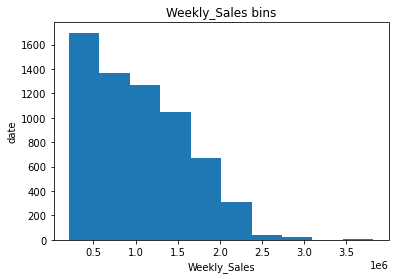

In [85]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(data["Weekly_Sales"])

# set x/y labels and plot title
plt.pyplot.xlabel("Weekly_Sales")
plt.pyplot.ylabel("date")
plt.pyplot.title("Weekly_Sales bins")

In [86]:
bins = np.linspace(min(data["Weekly_Sales"]), max(data["Weekly_Sales"]), 4)
bins

array([ 209986., 1412886., 2615786., 3818686.])

In [88]:
data["Weekly_Sales"].value_counts()

764014     2
1466046    2
439132     2
917883     2
705557     2
          ..
553901     1
533161     1
527509     1
587259     1
760281     1
Name: Weekly_Sales, Length: 6424, dtype: int64

Text(0.5, 1.0, 'Weekly_Sales')

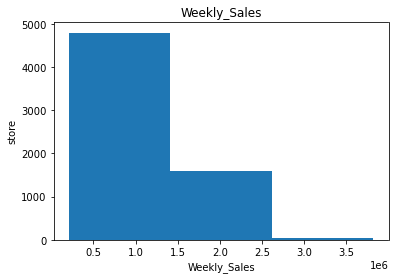

In [90]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# draw historgram of attribute "Weekly_Sales" with bins = 3
plt.pyplot.hist(data["Weekly_Sales"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("Weekly_Sales")
plt.pyplot.ylabel("store")
plt.pyplot.title("Weekly_Sales")

In [92]:
data.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Fuel_Price/100km'],
      dtype='object')

In [111]:
dummy_variable_1 = pd.get_dummies(data["Holiday_Flag"])
dummy_variable_1.head()

,0.0,1.0
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


In [112]:
dummy_variable_1.rename(columns={'gas':'Holiday_Flag-gas', 'diesel':'Holiday_Flag-diesel'}, inplace=True)
dummy_variable_1.head()

,0.0,1.0
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


In [114]:
# merge data frame "data" and "dummy_variable_1" 
data = pd.concat([data, dummy_variable_1], axis=1)

# drop original column "Holiday_Flag" from "data"
data.drop("Holiday_Flag", axis = 1, inplace=True)

In [115]:
data.head()

,Store,Date,Temperature,Fuel_Price,CPI,Unemployment,Fuel_Price/100km,209986,213538,215359,...,3526713,3555371,3556766,3595903,3676388,3749057,3766687,3818686,0.0,1.0
0,1,05-02-2010,42.31,2.572,211.096358,8,91.368585,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,12-02-2010,38.51,2.548,211.242170,8,92.229199,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,19-02-2010,39.93,2.514,211.289143,8,93.476531,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,26-02-2010,46.63,2.561,211.319643,8,91.761031,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,05-03-2010,46.5,2.625,211.350143,8,89.523810,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
data.to_csv('clean_data.csv')